In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\StaunchTech\Documents\Gomycode Final Project\Data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Overview and sanity checks


In [6]:
### Data Overview and sanity checks
df.shape

(7043, 21)

In [7]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
# Show percentage of each class in the target variable
df["Churn"].value_counts(normalize=True)* 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [9]:
sns.set_style("whitegrid")

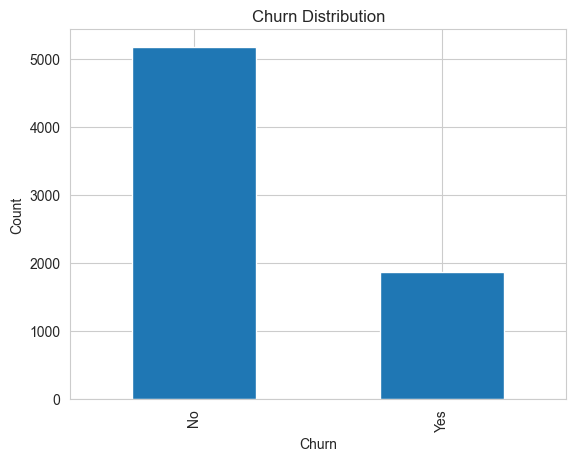

In [10]:
df["Churn"].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
## Total charges to numeric since it is object
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<function matplotlib.pyplot.show(close=None, block=None)>

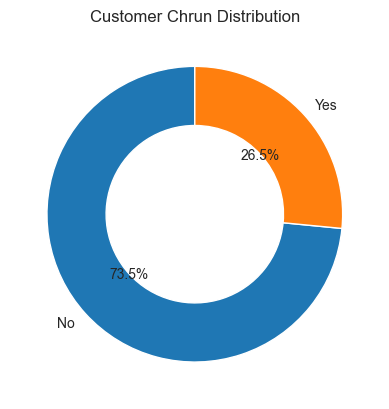

In [16]:
### Plotting a Donught Chat
sizes = df["Churn"].value_counts()
labels = sizes.index
fig, ax = plt.subplots()

ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4}
)

ax.set_title('Customer Chrun Distribution')
plt.show

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


The numerical colums doesn't look skwewed except the TotalCharges

# Demographics Charts

In [18]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64

In [19]:
pd.crosstab(df['gender'], df['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [20]:
## Gender and Churn
pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


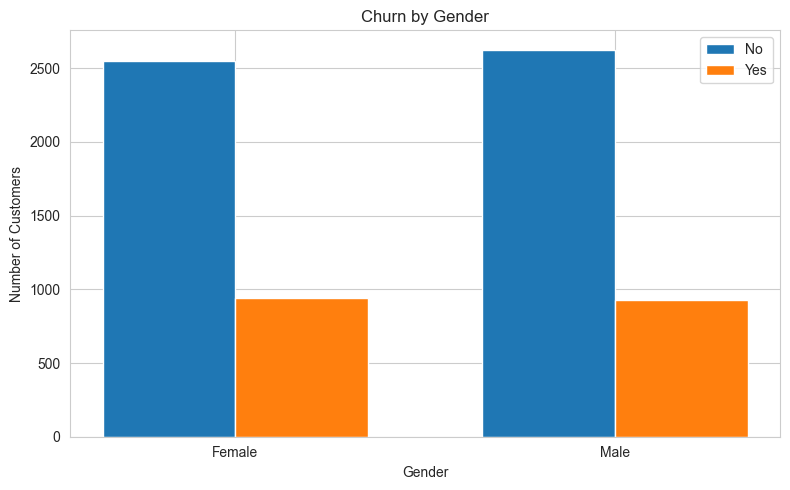

In [21]:
ct = pd.crosstab(df['gender'], df['Churn'])
# Values
labels = ct.index                 # ['Female', 'Male']
churn_no = ct['No'].values
churn_yes = ct['Yes'].values

x = np.arange(len(labels))        # positions
width = 0.35                      # bar width

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, churn_no, width, label='No')
plt.bar(x + width/2, churn_yes, width, label='Yes')

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Churn by Gender')
plt.xticks(x, labels)
plt.legend()

plt.tight_layout()
plt.show()

Gender did not affect the churning

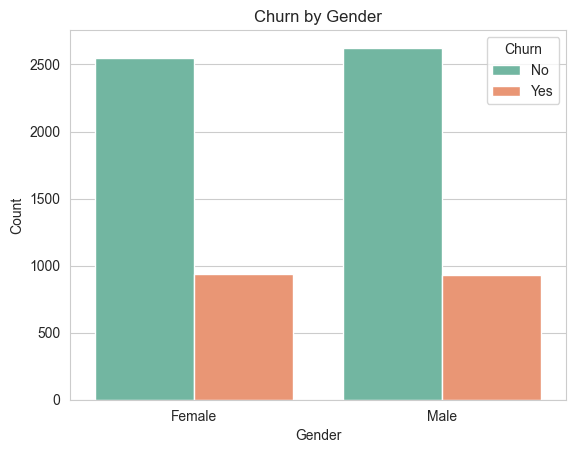

In [31]:
## Using Seaborn to plot countplot
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

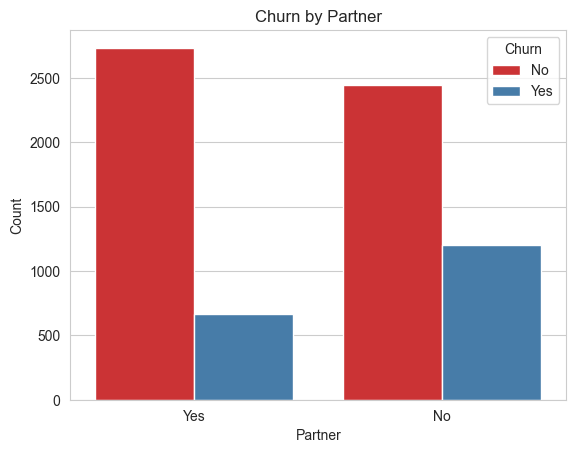

In [25]:
## Using Seaborn to plot countplot
sns.countplot(data=df, x='Partner', hue='Churn', palette='Set1')
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

💡 Insights: Customers without partners Churn more.

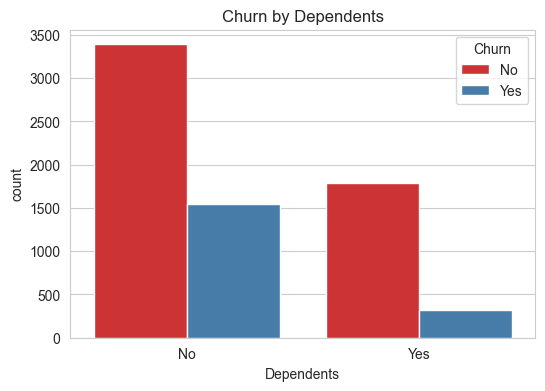

In [32]:
## Using Seaborn to plot countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set1')
plt.title('Churn by Dependents')
#plt.xlabel('Dependents')
#plt.ylabel('Count')
plt.show()

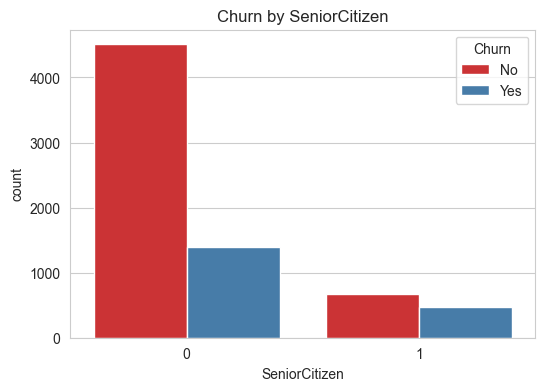

In [44]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set1')
plt.title('Churn by SeniorCitizen')
plt.show()

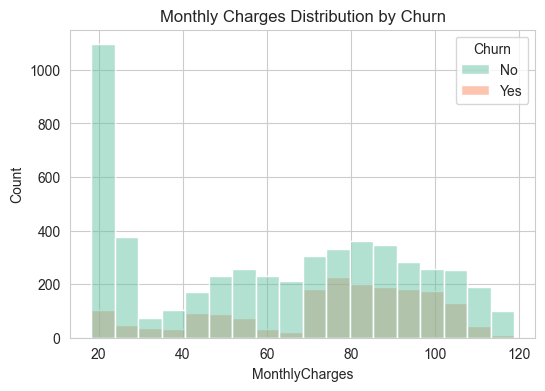

In [43]:
## Using Seaborn to plot countplot on monthlyCharges and TotaolCharges against Churn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', palette='Set2')
plt.title('Monthly Charges Distribution by Churn')  
plt.show()

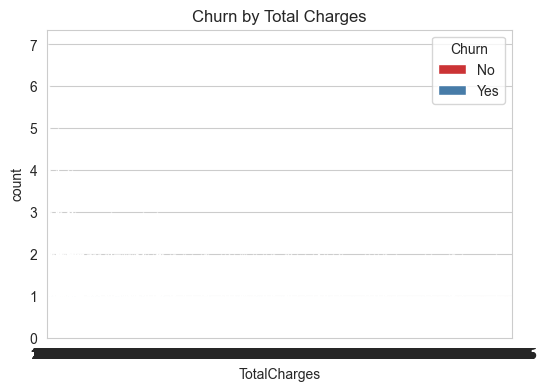

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TotalCharges', hue='Churn', palette='Set1')
plt.title('Churn by Total Charges')
plt.show()